#MSPA PREDICT 411

##Bonus Problem: Chapter 1

In [1]:
#!pip install sas7bdat

import numpy as np
import pandas as pd
import statsmodels.api as sm

from patsy import dmatrices
from sas7bdat import SAS7BDAT

import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab

sns.set_style('darkgrid')
%matplotlib inline

###Introduction

This document presents the results of first set of bonus problems for the Masters of Science in Predictive Analytics course: PREDICT 411. This assessment required the student to work through the problem set of Chapters 1 & 2 of Hoffmann (2004), Generalized Linear Models, An Applied Approach.

###Question 1

####Loading the Data

In [2]:
with SAS7BDAT('data/gpa.sas7bdat') as f:
    df_gpa = f.to_data_frame()

In [3]:
df_gpa.head(5)

,GPA,SAT_QUAN,SAT_VERB,HS_MATH,HS_ENGL
0,1.97,3.21,2.47,2.30,2.63
1,2.74,7.18,4.36,3.80,3.57
2,2.19,3.58,5.78,2.98,2.57
3,2.60,4.03,4.47,3.58,2.21
4,2.98,6.40,5.63,3.38,3.48


####Part A

Construct a scatterplot with GPA on the y-axis and SAT-Quant. on the x-axis. Fit by hand the estimated linear regression line. Comment on the relationship between these two variables.

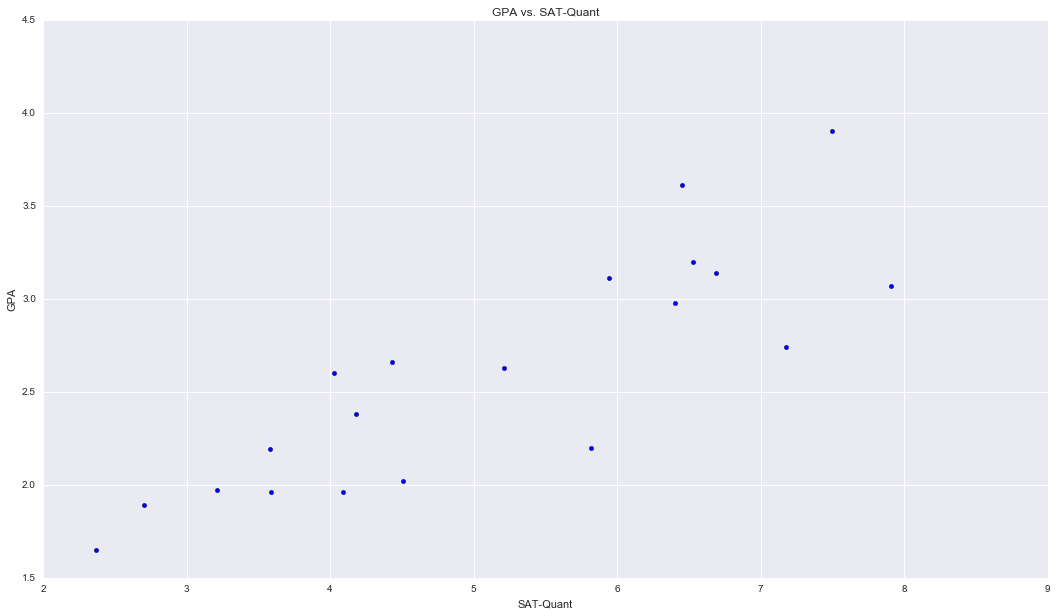

In [4]:
fig, ax = plt.subplots()
fig.set_size_inches(18, 10)

plt.scatter(df_gpa['SAT_QUAN'], df_gpa['GPA'])
plt.title('GPA vs. SAT-Quant')
plt.ylabel('GPA')
plt.xlabel('SAT-Quant')

plot = ax.get_figure()
plot.savefig('figures/q1_scatter.png')

####Part B

Using the formulas for a two-variable OLS regression model, compute the slope and intercept for the follwoing model: 

$$GPA = \alpha + \beta_1(\text{SAT-Quant})$$

In [5]:
x = df_gpa['SAT_QUAN'][:8].tolist()
y = df_gpa['GPA'][:8].tolist()
x_mean = np.mean(x)
y_mean = np.mean(y)

d_mean = []
for a, b in zip(x, y):
    d_mean.append((a - x_mean)*(b - y_mean))

numer = sum(d_mean)
    
d_sq = []
for a in x:
    d_sq.append(np.square(a - x_mean))
    
denom = sum(d_sq)

beta_hat = numer / denom

print(beta_hat)

0.239175919707


We will also compute the intercept using the formula: 

$$\hat{\alpha} = \bar{Y} - \hat{\beta_1}\bar{X}$$

In [6]:
alpha_hat = y_mean - beta_hat * x_mean

print(alpha_hat)

1.29396628773


####Part C

Compute the predicted values, the residuals, the Sum of Square Errors (SSE), and the $R^2$ for the model.

We will compute the predicted values by using our regression equation and computed parameters above, in the equation: 

$$GPA = 1.2939 + 0.2391 (\mbox{SAT-Quant})$$

In [7]:
y_hat = []
for a in x:
    y_hat.append(1.2939 + 0.2391 * a)

#for a in y_hat:
#    print(a)

We will compute residuals using the formula: 

$$R_i = Y_i - \hat{Y}$$

In [8]:
res = []
for a, b in zip(y, y_hat):
    res.append(a-b)
    
#for a in res:
#    print(a)

We will compute the Sum of Square Errors (SSE) using the formula: 

$$SSE = \sum_{i=1}^n(Y_i - \hat{Y_i})^2$$

In [9]:
sse = []
for a, b in zip(y, y_hat):
    sse.append(np.square(a - b))

sse = sum(sse)

print(sse)

0.279123802811


We will compute the $R^2$ using the formula: 

$$R^2 = 1- \frac{SSE}{SST}$$ 

where SSE is enumerated above and SST is: 

$$SST = \sum_i^n(Y_i - \bar{Y})^2$$

In [10]:
sst = []
for a in y:
    sst.append(np.square(a - y_mean))

sst = sum(sst)
r_square = 1 - sse / sst

print(r_square)

0.809341664747


####Part D

Plot the residuals (y-axis) by the predicted values (x-axis) and comment about what you see.

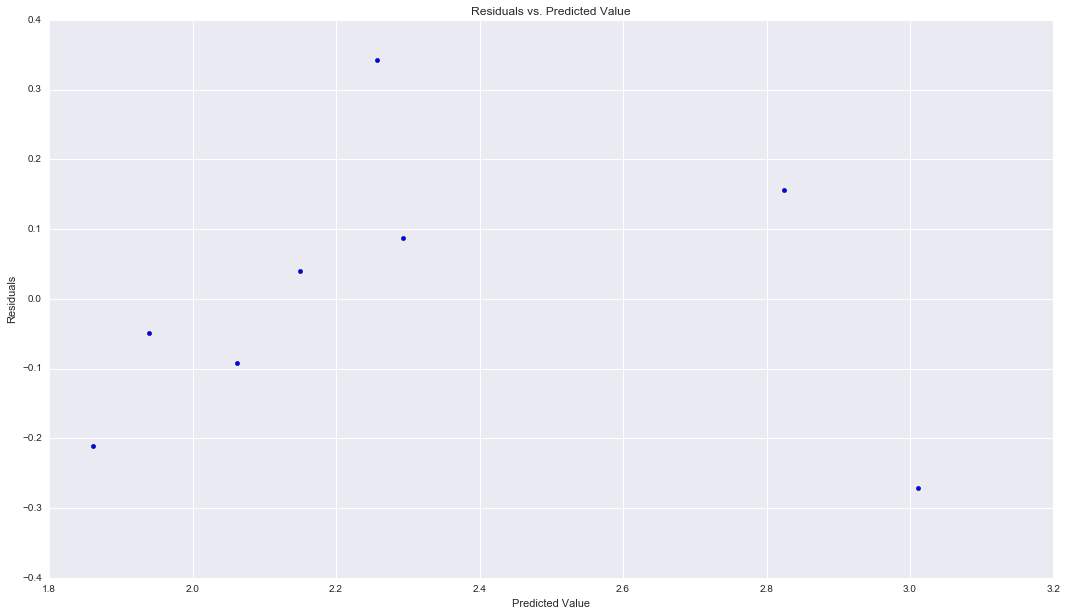

In [11]:
fig, ax = plt.subplots()
fig.set_size_inches(18, 10)

plt.scatter(y_hat, res)
plt.title('Residuals vs. Predicted Value')
plt.xlabel('Predicted Value')
plt.ylabel('Residuals')

plot = ax.get_figure()
plot.savefig('figures/q1_resid.png')

###Question 2

The data set GPA is available in SPSS, Stata, and SAS formats. It contains all 20 observations from the sample of college students. We'll use it to conduct the remaining excercises.

####Part A

Estimate an OLS regression model with GPA as the dependent variable and SAT-Quant. as the independent variable. Compare this model to the model you estimated in Excercise 1. In what ways are they similar or different?

In [12]:
y, X = dmatrices('GPA ~ SAT_QUAN', 
                 data=df_gpa, 
                 return_type='dataframe')
model = sm.OLS(y, X)
results = model.fit()

results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    GPA   R-squared:                       0.722
Model:                            OLS   Adj. R-squared:                  0.706
Method:                 Least Squares   F-statistic:                     46.68
Date:                Mon, 20 Jun 2016   Prob (F-statistic):           2.15e-06
Time:                        14:49:50   Log-Likelihood:                -5.5719
No. Observations:                  20   AIC:                             15.14
Df Residuals:                      18   BIC:                             17.14
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept      0.9670      0.250      3.874      0.001         0.443     1.491
SAT_QUAN       0.3178      0.047      6.832      0.000         0.220     0.416
==============================================================================
Omnibus:                        0.075   Durbin-Watson:                   2.807
Prob(Omnibus):                  0.963   Jarque-Bera (JB):                0.279
Skew:                          -0.092   Prob(JB):                        0.870
Kurtosis:                       2.452   Cond. No.                         18.3
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

###Question 3

Estimate the following three OLS regression models, all of which use GPA as the dependent variable.

####Part A

Use only HS_ENGL as the independent variable.

In [13]:
y, X = dmatrices('GPA ~ HS_ENGL', 
                 data=df_gpa, 
                 return_type='dataframe')
model = sm.OLS(y, X)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    GPA   R-squared:                       0.368
Model:                            OLS   Adj. R-squared:                  0.333
Method:                 Least Squares   F-statistic:                     10.47
Date:                Mon, 20 Jun 2016   Prob (F-statistic):            0.00458
Time:                        14:49:50   Log-Likelihood:                -13.777
No. Observations:                  20   AIC:                             31.55
Df Residuals:                      18   BIC:                             33.55
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept      0.2487      0.733      0.339      0.738        -1.292     1.789
HS_ENGL        0.7790      0.241      3.236      0.005         0.273     1.285
==============================================================================
Omnibus:                        0.077   Durbin-Watson:                   2.488
Prob(Omnibus):                  0.962   Jarque-Bera (JB):                0.273
Skew:                           0.102   Prob(JB):                        0.872
Kurtosis:                       2.466   Cond. No.                         21.7
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

####Part B

Use HS_ENGL and SAT_VERB as the independent variables.

In [14]:
y, X = dmatrices('GPA ~ HS_ENGL + SAT_VERB', 
                 data=df_gpa, 
                 return_type='dataframe')
model = sm.OLS(y, X)
results = model.fit()

results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    GPA   R-squared:                       0.562
Model:                            OLS   Adj. R-squared:                  0.510
Method:                 Least Squares   F-statistic:                     10.90
Date:                Mon, 20 Jun 2016   Prob (F-statistic):           0.000898
Time:                        14:49:50   Log-Likelihood:                -10.109
No. Observations:                  20   AIC:                             26.22
Df Residuals:                      17   BIC:                             29.20
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept     -0.0572      0.638     -0.090      0.930        -1.403     1.289
HS_ENGL        0.5195      0.227      2.290      0.035         0.041     0.998
SAT_VERB       0.2273      0.083      2.745      0.014         0.053     0.402
==============================================================================
Omnibus:                        0.371   Durbin-Watson:                   2.507
Prob(Omnibus):                  0.831   Jarque-Bera (JB):                0.487
Skew:                           0.255   Prob(JB):                        0.784
Kurtosis:                       2.431   Cond. No.                         40.1
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

####Part C

Use HS_ENGL, SAT_VERB, and SAT_QUAN as the independent variables

In [15]:
y, X = dmatrices('GPA ~ HS_ENGL + SAT_VERB + SAT_QUAN', 
                 data=df_gpa, 
                 return_type='dataframe')
model = sm.OLS(y, X)
results = model.fit()

results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    GPA   R-squared:                       0.811
Model:                            OLS   Adj. R-squared:                  0.776
Method:                 Least Squares   F-statistic:                     22.89
Date:                Mon, 20 Jun 2016   Prob (F-statistic):           4.95e-06
Time:                        14:49:50   Log-Likelihood:                -1.7007
No. Observations:                  20   AIC:                             11.40
Df Residuals:                      16   BIC:                             15.38
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept      0.4863      0.448      1.086      0.294        -0.463     1.436
HS_ENGL        0.0111      0.189      0.059      0.954        -0.390     0.412
SAT_VERB       0.1568      0.058      2.699      0.016         0.034     0.280
SAT_QUAN       0.2586      0.056      4.593      0.000         0.139     0.378
==============================================================================
Omnibus:                        0.803   Durbin-Watson:                   2.332
Prob(Omnibus):                  0.669   Jarque-Bera (JB):                0.736
Skew:                           0.186   Prob(JB):                        0.692
Kurtosis:                       2.137   Cond. No.                         56.7
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

###Question 4

####Part A

Interpret the unstandardized coefficient associated with HS_ENGL from model 3(a):

$$GPA = 0.2487 + 0.7790 (\mbox{HS_ENGL})$$

Expect a one unit increase in HS_ENGL to be associated with a 0.7790 increase in GPA.

####Part B

Interpret the unstandardized coefficient associated with SAT_QUAN from model 3(c):

$$GPA = 0.4863 + 0.0111 (\mbox{HS_ENGL} + 0.1568 (\mbox{SAT_VERB}) + 0.2586 (\mbox{SAT_QUAN})$$

Expect a one unit increase in SAT_QUAN to be associated with a 0.2586 increase in GAP.

####Part C

Interperate the $R^2$ from model 3(c):

The $R^2$ shows the proportion of variability in the dependent variable that is explained by the model. In the case of model 3, the $R^2$ suggests that 81% of the variability in GPA is explained by the model.

###Question 5

Something happened to the association between HS_ENGL and GPA as we moved from model (a) to model (c). Please describe what might have happened. Remember to provide statistical evidence to support your answer. Speculate in a conceptual way why this may have happened.

###Question 6

Using model 3(c), check the following regression diagnostics and comment about any problems with the model.

####Part A

A normal probability plot of the residuals.

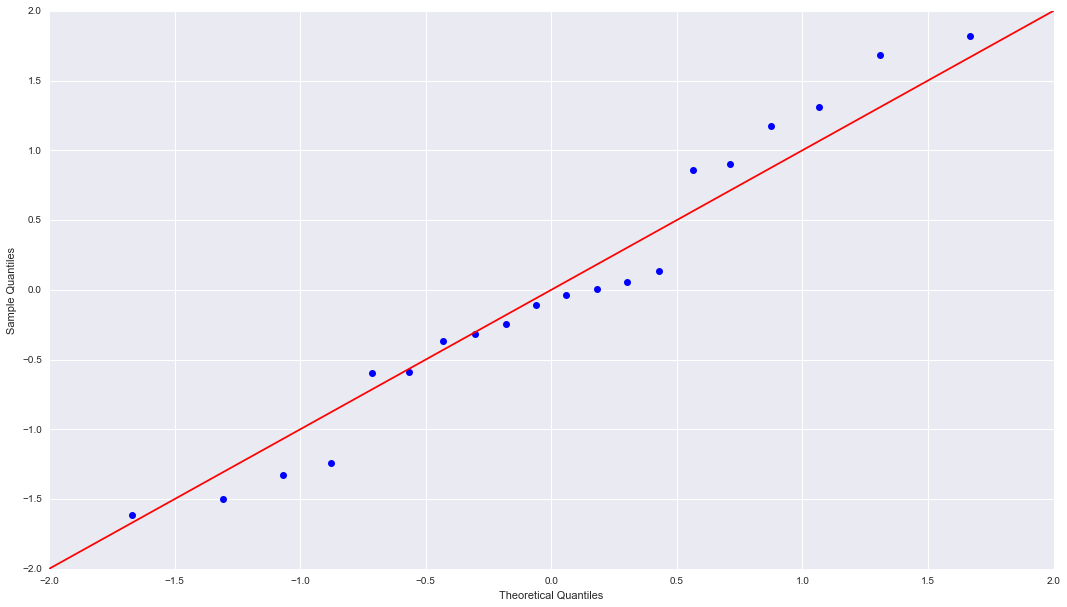

In [16]:
res = results.resid
fig = sm.qqplot(res, fit=True, line='45')

fig.set_size_inches(18, 10)
fig.savefig('figures/q6_qqplot.png')

####Part B

A Plot of the residuals by the predicted values. You may wish to use studentized residuals and standardized predicted values in the plot.

In [17]:
engl = df_gpa['HS_ENGL'].tolist()
verb = df_gpa['SAT_VERB'].tolist()
quan = df_gpa['SAT_QUAN'].tolist()

y_hat = []
for a, b, c in zip(engl, verb, quan):
    y_hat.append(0.4863 + 0.0111 * a + 0.1568 * b + 0.2586 * c)

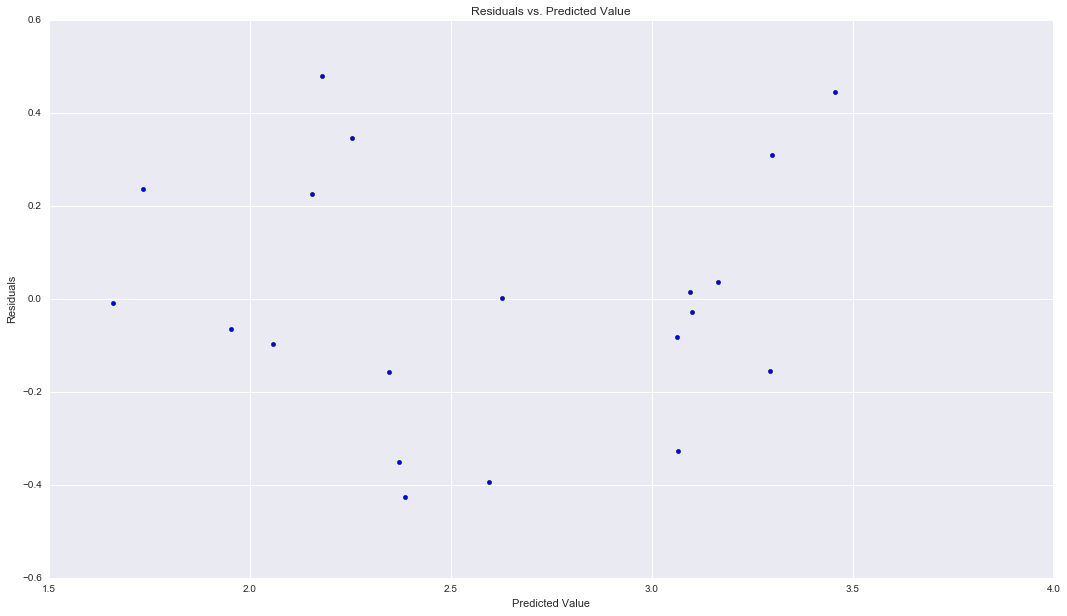

In [18]:
fig, ax = plt.subplots()
fig.set_size_inches(18, 10)

plt.scatter(y_hat, res)
plt.title('Residuals vs. Predicted Value')
plt.xlabel('Predicted Value')
plt.ylabel('Residuals')

plot = ax.get_figure()
plot.savefig('figures/q6_resid.png')

####Part C

A distribution of the standardized (or studentized) residuals, the leverage values, and the Cook's D values.

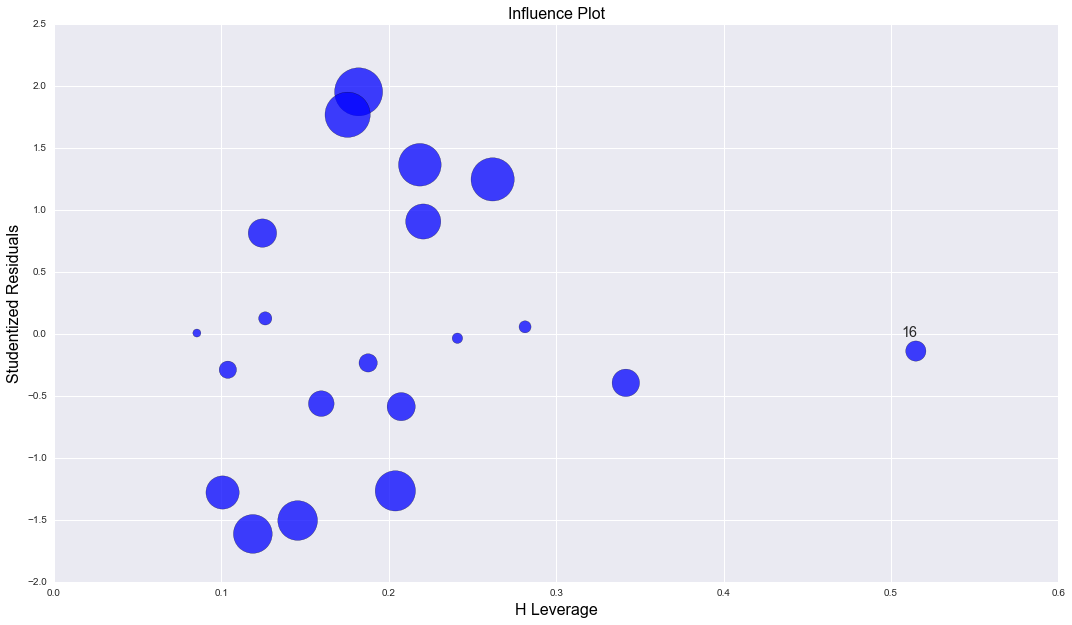

In [19]:
res = results.resid
fig = sm.graphics.influence_plot(results, criterion='cooks')

fig.set_size_inches(18, 10)
fig.savefig('figures/q6_cooks.png')